## 2.18. Changed sigma's effect on mean

[1] "mean"             "1,00032077962557"
[1] "mean"              "0,991199307257726"
[1] "mean"              "0,995611158055107"


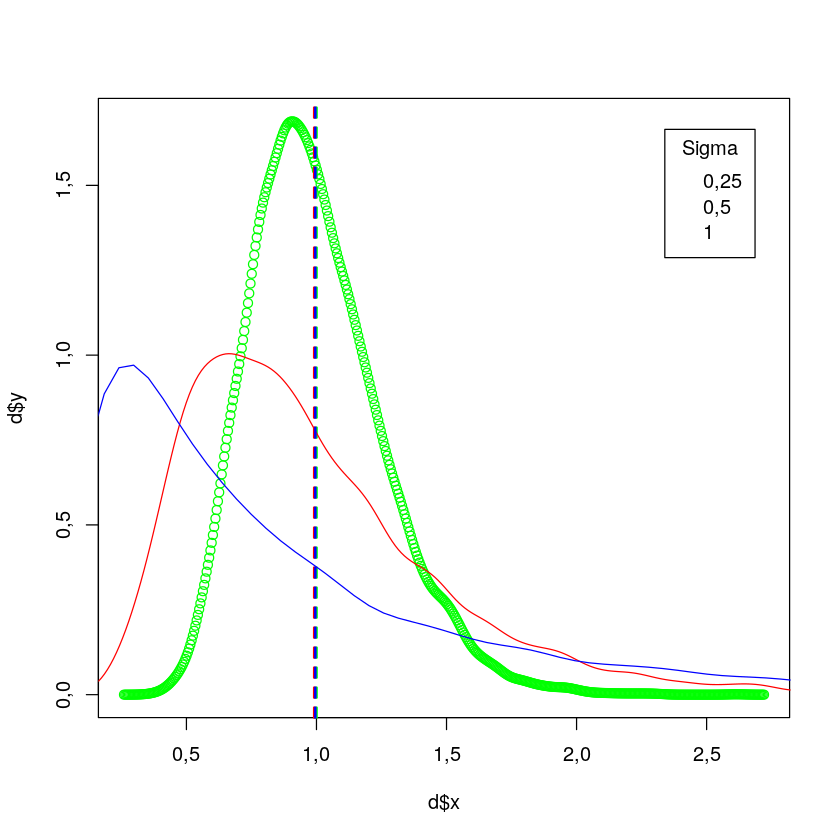

In [45]:
sigmas <- c(.25, .5, 1)
xsi <- 1
m <- 1e4
colors <- c("green", "red", "blue", "magenta ", 'yellow')

counter = 1
for (sigma in sigmas){
    eps = rnorm(m)
    X = xsi*exp(-sigma^2/2. + sigma*eps)
    mean = mean(X)
    print(c('mean', mean))


    d = density(X)
    if (sigma == .25){
        plot(d$x, d$y, col=colors[counter])
        abline(v = mean, lty=2, lwd=2, col=colors[counter])

    }
    else{
        lines(d$x, d$y, col=colors[counter])
        abline(v = mean, lty=2, lwd=2, col=colors[counter])    
        }
    
    counter = counter +1
}
legend("topright", inset=.05, title="Sigma", legend=sigmas, col = colors);

# Exercise 2.19 and 2.20: log returns.

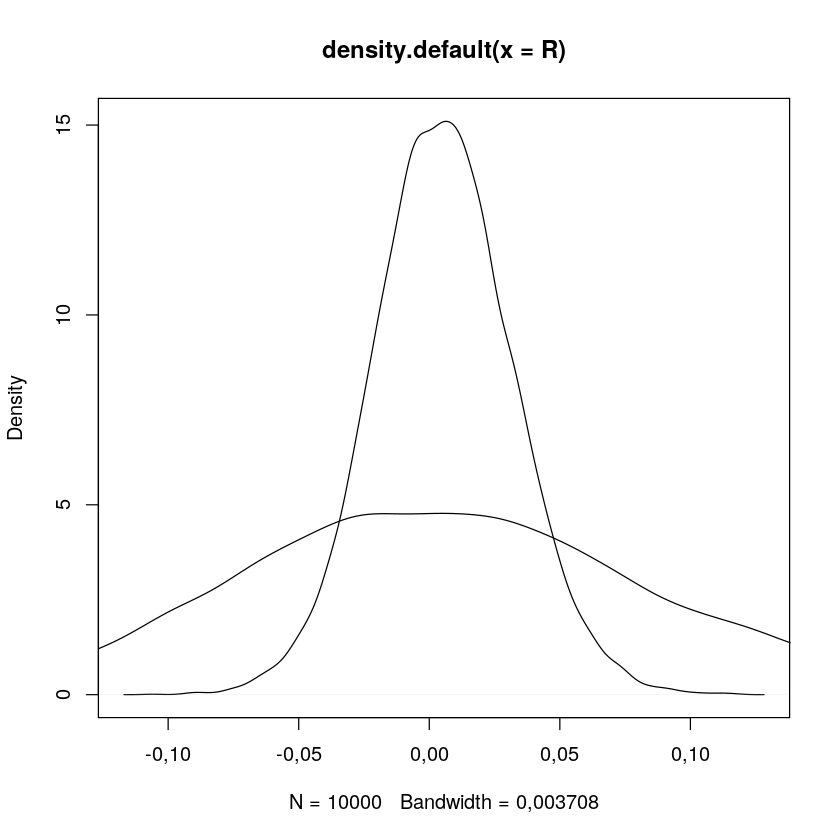

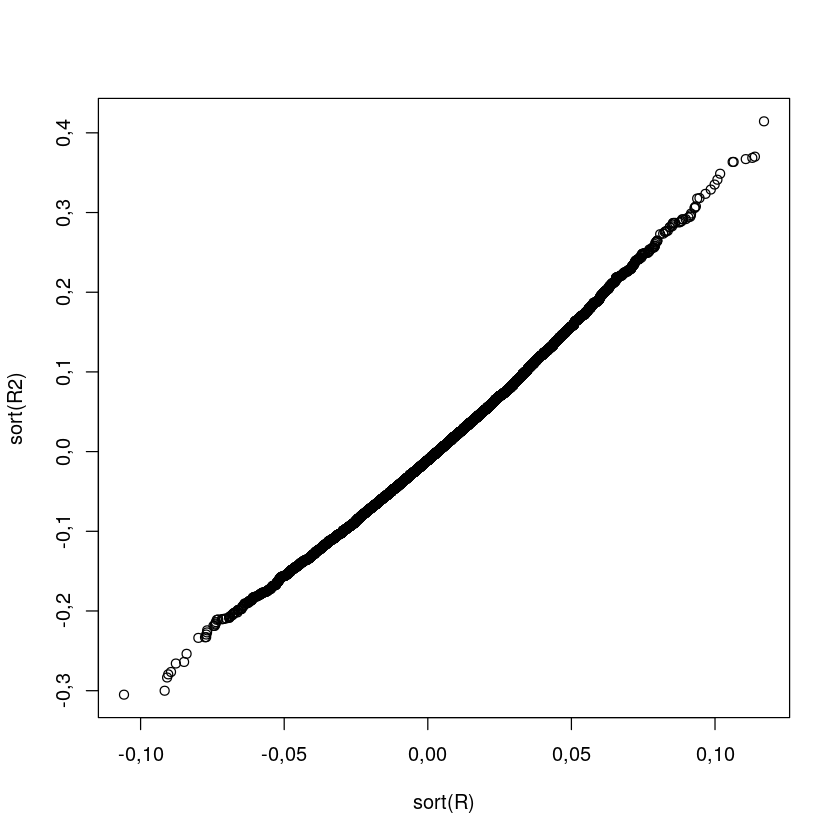

In [10]:
m <- 1e4
xsi <- .005
xsiSigma <- .08
alpha <- 10

eps = rnorm(m)
G = rgamma(m, alpha)
R = exp(xsi + xsiSigma*eps/sqrt(G)) - 1
plot(density(R))

# 2.20
tau = sqrt(log(1 + 1./alpha))
eta = rnorm(m)
Z = exp(tau^2/2. + tau*eta)
R2 = exp(xsi + xsiSigma*sqrt(Z)*eps) - 1
d = density(R2)
lines(d$x, d$y)

plot(sort(R), sort(R2))

# Exercise 2.21 Dependent variables

In [43]:
m = 10#1e5
xsi = .05
sigma = .25
rhos = c(0, .6, .9)

eps = matrix(rnorm(2*m), m, 2) # one eps per column
#print(eps)

for (rho in rhos){
    eps[,2] = rho*eps[,1]+sqrt(1-rho**2)*eps[,2] # changes eps2, which is column 2, to take into account dependence
    R = exp(xsi +sigma*eps) - 1
    R = .5*(R[,1] + R[,2])
    print(c('rho ', rho))
    print(c('mean R: ', mean(R)))
    print(c('sd R: ', sd(R))) 
    print('######################')
}

[1] "rho " "0"   
[1] "mean R: "         "0,13439351229398"
[1] "sd R: "            "0,230266413047903"
[1] "######################"
[1] "rho " "0,6" 
[1] "mean R: "          "0,145414703142384"
[1] "sd R: "           "0,29626516216505"
[1] "######################"
[1] "rho " "0,9" 
[1] "mean R: "          "0,159761729636865"
[1] "sd R: "            "0,352860974043671"
[1] "######################"
